Ahmed Baari.  
126156004  

# Upsampling and Downsampling of Time Series Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [9]:
# Sample time series data
data = {'Time': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Value': [10, 12, 15, 14, 16, 18, 20, 19, 22, 25]}
df = pd.DataFrame(data)
df = df.set_index('Time')

### Upsampling

In [10]:
# Upsampling (every 6 hours)
upsampled_df = df.resample('6H').asfreq()

<ipython-input-10-4fef85069a81>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  upsampled_df = df.resample('6H').asfreq()


### Interpolation Methods

In [11]:
# Linear Interpolation
upsampled_linear = upsampled_df.interpolate(method='linear')

# spline interpolation, 2 order
upsampled_spline = upsampled_df.interpolate(method='spline', order=2)

upsampled_spline[:5]

,Value
Time,
2023-01-01 00:00:00,10.000000
2023-01-01 06:00:00,11.012405
2023-01-01 12:00:00,11.336742
2023-01-01 18:00:00,11.663920
2023-01-02 00:00:00,12.000000


### Downsampling

In [12]:
# downsample (every 2 days)
downsampled_df = df.resample('2D').mean()

downsampled_df.head()

,Value
Time,
2023-01-01,11.0
2023-01-03,14.5
2023-01-05,17.0
2023-01-07,19.5
2023-01-09,23.5


### Visualization

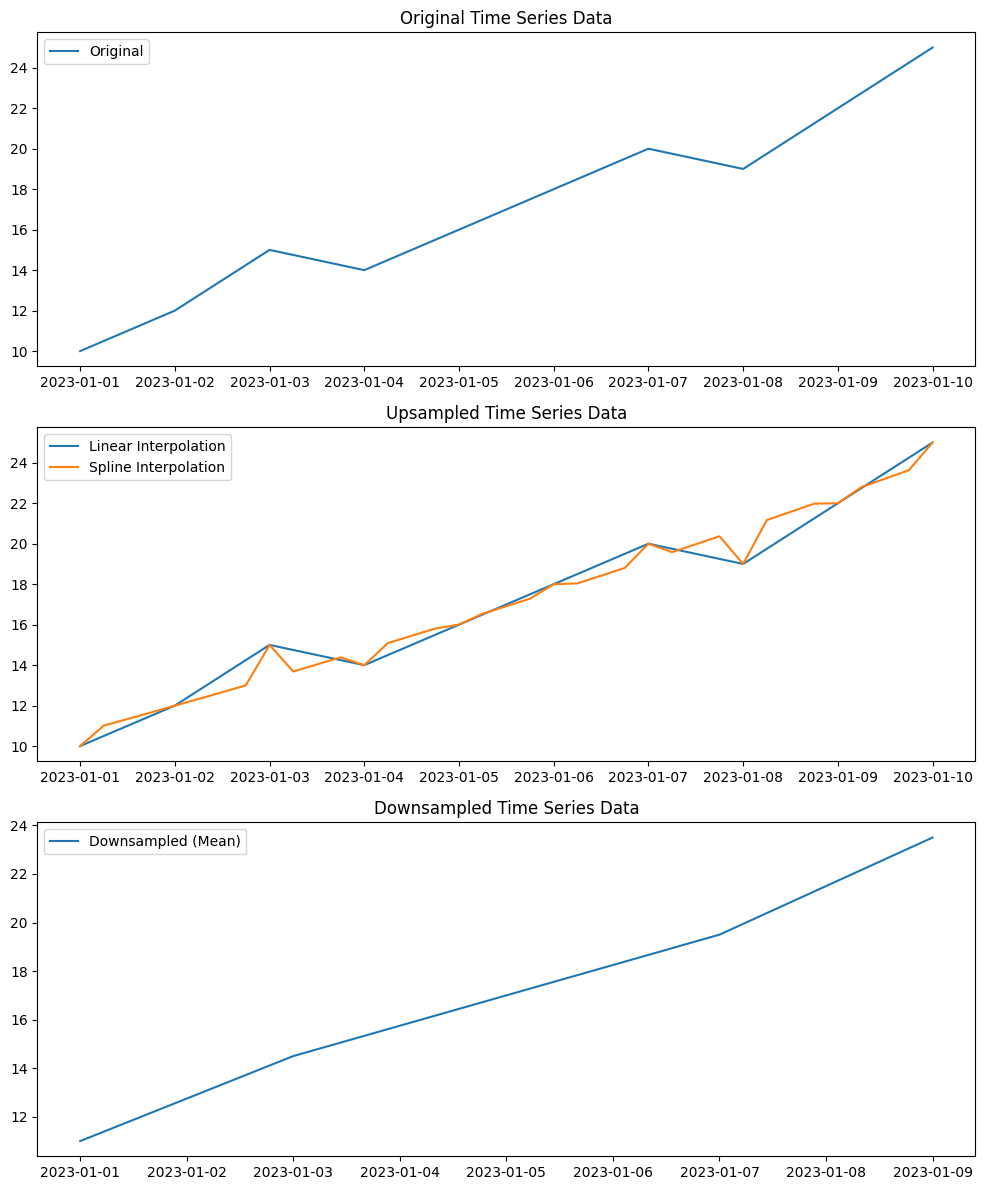

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Original data
axes[0].plot(df.index, df['Value'], label='Original')
axes[0].set_title('Original Time Series Data')
axes[0].legend()


# Upsampled data
axes[1].plot(upsampled_linear.index, upsampled_linear['Value'], label='Linear Interpolation')
axes[1].plot(upsampled_spline.index, upsampled_spline['Value'], label='Spline Interpolation')
axes[1].set_title('Upsampled Time Series Data')
axes[1].legend()


# Downsampled data
axes[2].plot(downsampled_df.index, downsampled_df['Value'], label='Downsampled (Mean)')
axes[2].set_title('Downsampled Time Series Data')
axes[2].legend()

plt.tight_layout()
plt.show()




### Data Grouping and Summary

In [14]:
# Example Grouping by day
df['Day'] = df.index.day

# Grouped
grouped_df = df.groupby('Day').agg({'Value': ['min', 'max', 'mean', 'median']}) # group and calculate summary stats
grouped_df


Value                 
      min max  mean median
Day                       
1      10  10  10.0   10.0
2      12  12  12.0   12.0
3      15  15  15.0   15.0
4      14  14  14.0   14.0
5      16  16  16.0   16.0
6      18  18  18.0   18.0
7      20  20  20.0   20.0
8      19  19  19.0   19.0
9      22  22  22.0   22.0
10     25  25  25.0   25.0

In [ ]:
# thank you!